In [2]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 

# 读取数据
data = pd.read_json('data.json')
data.head()

,x,y
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,"[2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


In [3]:
temp_data = []
for i in range(len(data['x'])):
  temp_data.append(np.asarray(data['x'][i]))

print(temp_data[0])

#dataset = tf.data.Dataset.from_tensor_slices((data['x'].values, data['y'].values))

[0.     0.     0.     ... 0.0036 0.     0.    ]


In [4]:
alldata = np.asarray(temp_data)
allabel = np.asarray(data['y'])


In [5]:
from keras.utils.np_utils import to_categorical
allabel = to_categorical(allabel)
print(allabel)

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Using TensorFlow backend.


In [6]:
print(type(allabel[0]))

<class 'numpy.ndarray'>


In [7]:
dataset = tf.data.Dataset.from_tensor_slices((alldata, allabel))

In [8]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [0.     0.     0.     ... 0.0036 0.     0.    ], Target: [1. 0. 0.]
Features: [0.     0.     0.     ... 0.     0.     0.0046], Target: [0. 0. 1.]
Features: [0.     0.     0.     ... 0.     0.     0.0012], Target: [0. 0. 1.]
Features: [2.     2.     2.     ... 0.     0.     0.0027], Target: [1. 0. 0.]
Features: [0.     0.     0.     ... 0.     0.     0.0015], Target: [1. 0. 0.]


In [14]:
x_train = alldata[:3200]
x_test = alldata[3200:]
y_train = allabel[:3200]
y_test = allabel[3200:]

[0.     0.     0.     ... 0.0036 0.     0.    ]


In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(1147,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy'])

In [ ]:
train_dataset = dataset.batch(20)
model.fit(train_dataset, epochs=50)

In [18]:
history = model.fit(x_train,
          y_train,
          epochs=200,
          batch_size=100,
          validation_data=(x_test, y_test))

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.8159 - val_loss: 1.1698 - val_accuracy: 0.7094
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.8166 - val_loss: 1.1731 - val_accuracy: 0.7003
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4532 - accuracy: 0.8156 - val_loss: 1.1861 - val_accuracy: 0.7083
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.8134 - val_loss: 1.1833 - val_accuracy: 0.7060
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4522 - accuracy: 0.8141 - val_loss: 1.1868 - val_accuracy: 0.7117
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.8147 - val_loss: 1.1818 - val_accuracy: 0.7072
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.4507 - accuracy: 0.8184 - val_loss: 1.1904 - val_accuracy: 0.7026
Epoch 8/200
3

In [22]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

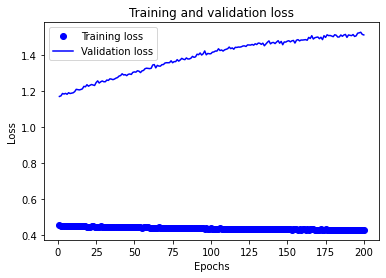

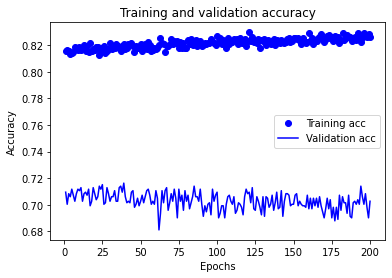

In [23]:
history_dict = history.history

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()